# Mean Shift clustering

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Dataset Source:-

https://www.kaggle.com/shwetabh123/mall-customers

In [2]:
# Importing the dataset
!wget 'https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/Mall_Customers.csv'

dataset = pd.read_csv('/content/Mall_Customers.csv',index_col='CustomerID')

--2022-09-08 06:04:14--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4086 (4.0K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.99K  --.-KB/s    in 0s      

2022-09-08 06:04:14 (51.3 MB/s) - ‘Mall_Customers.csv’ saved [4086/4086]



In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## Selecting features

In [4]:
# using only Spending_Score and income variable
X = dataset.iloc[:, [2, 3]].values

## Applying algorithm

In [5]:
bandwidth = estimate_bandwidth(X,quantile=0.2,n_samples=500)
bandwidth

27.161411938994306

In [6]:
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)

MeanShift(bandwidth=27.161411938994306)

## Predicting on entire dataset

In [7]:
P = ms.predict(X)

In [8]:
P

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [9]:
number_of_clusters = len(ms.cluster_centers_)
print('Number of clusters: ', number_of_clusters)

Number of clusters:  3


## Visualizing clusters

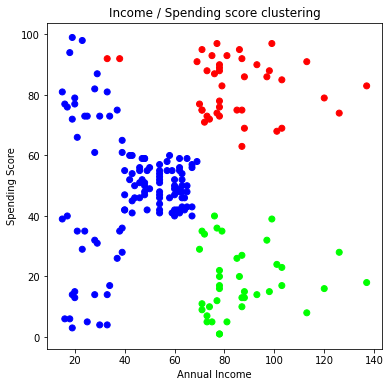

In [10]:
colors = list(map(lambda x: '#ff0000' if x == 1 else '#00ff00' if x == 2 else '#0000ff', P))
plt.figure(figsize=(6,6))
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("Income / Spending score clustering")
plt.scatter(X[:,0], X[:,1],c= colors, cmap='seismic')

## Mean Shift - Age / Spending score clustering

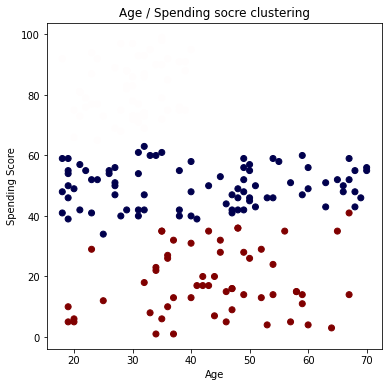

In [11]:
X = dataset.iloc[:, [1, 3]].values
bandwidth = estimate_bandwidth(X,quantile=0.2,n_samples=500)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)
ms_y_pred = ms.predict(X)
plt.figure(figsize=(6,6))
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title("Age / Spending socre clustering")
plt.scatter(X[:,0], X[:,1],c=ms_y_pred, cmap='seismic')

# Random dataset

In [12]:
clusters = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 150, centers = clusters, cluster_std = 0.60)

In [13]:
bandwidth = estimate_bandwidth(X,quantile=0.2,n_samples=500)

In [14]:
meanshift = MeanShift(bandwidth=bandwidth)

In [15]:
meanshift.fit(X)
cluster_centers = meanshift.cluster_centers_

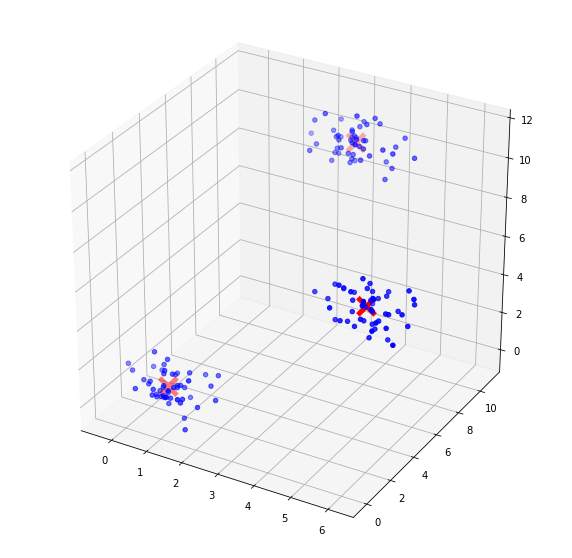

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o', c='blue')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
plt.show()